In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US =df_DA_US.dropna(subset= ['salary_year_avg'])

<Axes: >

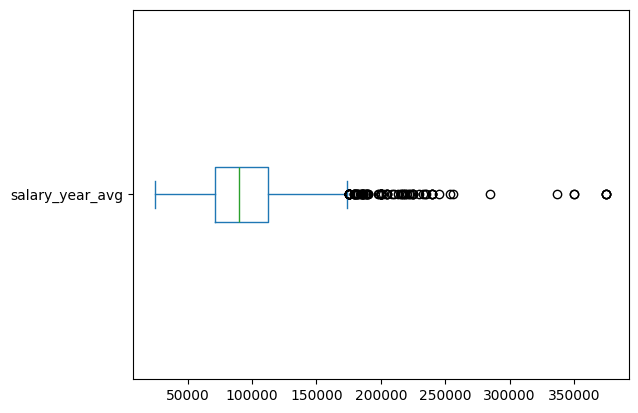

In [4]:
df_DA_US['salary_year_avg'].plot(kind = 'box', vert = False)

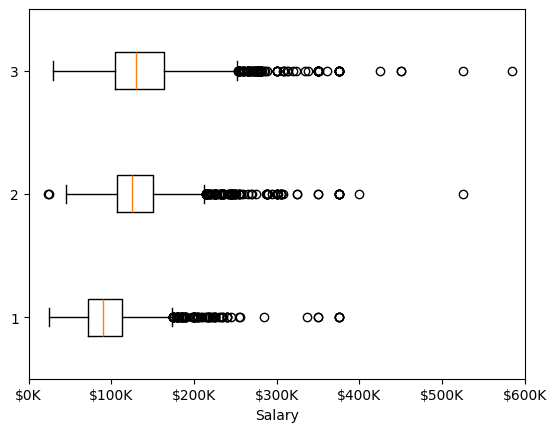

In [5]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

job_list =[df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, label =job_titles, vert=False)
plt.xlabel('Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()


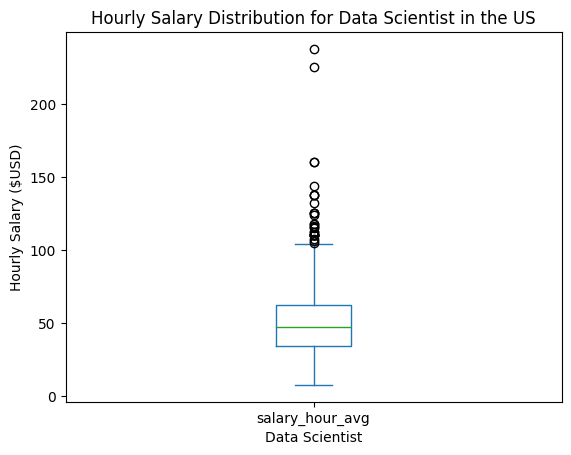

In [27]:
df_US_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset = 'salary_hour_avg')

df_US_ds['salary_hour_avg'].plot(kind = 'box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()


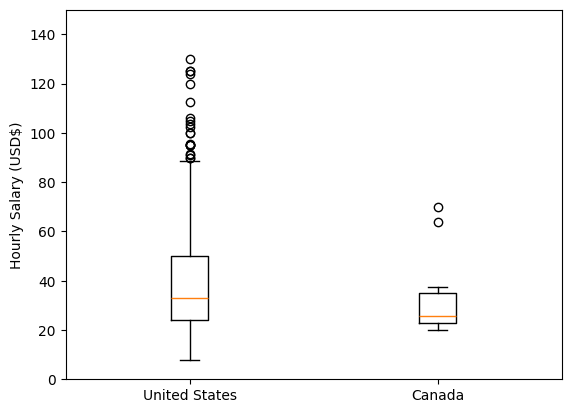

In [41]:
countries = ['United States', 'Canada']

df_filter = df[(df['job_country'].isin (countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset = 'salary_hour_avg')

country_data = [df_filter[df_filter['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_data, tick_labels = countries)
plt.ylim(0,150)
plt.ylabel('Hourly Salary (USD$)')
plt.show()

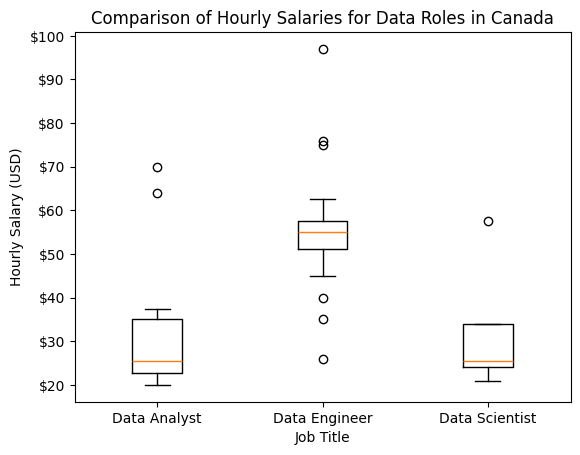

In [50]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_filter = df[(df['job_title_short'].isin (job_titles)) & (df['job_country'] == 'Canada')].dropna(subset = 'salary_hour_avg')

job_data = [df_job_filter[df_job_filter['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

fig, ax = plt.subplots()
ax.boxplot(job_data, tick_labels= job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()